In [1]:
# import pandas as pd
# import numpy as np
# from sklearn.model_selection import StratifiedKFold

# AMFD_Dataframe = pd.read_excel('AMFD_Norming_Data_Table.xlsx', skiprows=4)

# Git repo link: 
https://github.com/ScytheXS/JHU_Machine_Learning_601_675_Group_Project

In [2]:
#########################################Stracth Part############################################
# import torch
# from torchvision.transforms import Compose, Resize, ToTensor
# from PIL import Image
# import os

# # image paths
# image_dir = "AMFD_Faces_Final"
# image_paths = []
# for filename in os.listdir(image_dir):
#     if filename.endswith('.jpg'):
#         image_paths.append(os.path.join(image_dir, filename))

# # photoid = 1001+idx
# idx = 4

# # print idx-th image
# image_path = image_paths[idx]
# print(image_path)

# # Features tensor get
# features = torch.tensor(AMFD_Dataframe.iloc[idx, 0:].values, dtype=torch.float32)
# print(features)
# print(len(features))

# # Image ID get
# image_id = AMFD_Dataframe.iloc[idx, 0]
# print(image_id)

# # Expression and Gender get as label
# #image_path = "AMFD_Faces_Final\SF-1040.jpg"
# parts = image_path.split('\\')[-1].split('-')
# expression_code = parts[0][0]
# gender_code = parts[0][1]
# expression_label = 0 if expression_code == 'N' else 1
# gender_label = 0 if gender_code == 'F' else 1
# print(f"{image_path}'s expression code is {expression_code} and gender code is {gender_code}")

# # image to tensor
# image = Image.open(image_path).convert('RGB')
# image_tensor = ToTensor()(image)
# print(image_tensor)

# # check if image is all white or not
# any_value_over_1 = (image_tensor == 1).all().item()
# max_value = image_tensor.max().item()
# any_value_over_1, max_value

#########################################Stracth Part############################################

# Facial Recognition
Project mentor: Hao Ding

Yixuan Wang <ywang830@jh.edu>, Zhiquan Shen <zshen37@jh.edu>, Xinya Li <xli346@jh.edu>, Samuel Ye <jye52@jh.edu>

# Outline and Deliverables


**List** the deliverables from your project proposal. For each uncompleted deliverable, please include a sentence or two on why you weren't able to complete it (e.g. "decided to use an existing implementation instead" or "ran out of time"). For each completed deliverable, indicate which section of this notebook covers what you did.

If you spent substantial time on any aspects that weren't deliverables in your proposal, please list those under "Additional Work" and indicate where in the notebook you discuss them.

### Uncompleted Deliverables
1. Combining with U-Net, using the features already trained in the model to generate a new face through diffusion:ran out of time
2. By adding a control layer in the middle, adding a different style to the generated new face through diffusion:ran out of time
3. Using the control layer to generate different style faces for the input face:ran out of time
4. Using yolo-v5 to achieve quick facial expression and race recognition during the video:ran out of time
5. By combining yolo-v5, changing the recognized face with generated different styles new faces:ran out of time
6. By recognizing the facial expression of the face in the video, generate a different facial expression and replace the original face:ran out of time


### Completed Deliverables
1. "Dataset exploring and Pre-Processing": We discuss our dataset pre-processing [in "Dataset" below](#scrollTo=zFq-_D0khnhh&line=10&uniqifier=1).
2. "Using the facial data to train a model that can capture the facial features, including facial expressions, gender, race, and
attractiveness": We discuss training our logistic regression baseline [in "Baselines" below](#scrollTo=oMyqHUa0jUw7&line=5&uniqifier=1).
3. Using the model gives the test data faces an attractiveness score.
4. Using the model recognizes the facial expression of the test dataset faces.


### Additional Deliverables
1. We decided to add a second baseline using the published model from this paper. We discuss this [in "Baselines" below](#scrollTo=oMyqHUa0jUw7&line=5&uniqifier=1).
2. ...

# Preliminaries

### What problem were you trying to solve or understand?

What are the real-world implications of this data and task?

How is this problem similar to others we’ve seen in lectures, breakouts, and homeworks?

What makes this problem unique?

What ethical implications does this problem have?

We explore how facial recognition technology can be enhanced by improving convolutional neural network architecture, specifically the ability to recognize and parse facial expressions and the emotions behind them. The application of this technology may have a significant impact on the efficiency of security systems and the quality of personalized services, such as by optimizing the user interface to provide a more personalized user experience. What makes this subject unique is that it is not only highly technical, but also involves understanding the complex emotional aspects behind human expressions. From an ethical perspective, we highlight the need to take care when developing and applying facial recognition technology to avoid exacerbating social biases and to ensure privacy and fairness when processing personal data. 



## Dataset(s)
Describe the dataset(s) you used.

How were they collected?

Why did you choose them?

How many examples in each?

Regarding Dataset, we utilized the American Multiracial Face Database available from https://osf.io/qsdrp/. This dataset
comprises images of 110 individuals, with each individual originally intends to be represented by one neutral face and one smiling face,
total 220 images with resolution of 2444x1718 pixels. However, the collection is missing one individual’s photograph, resulting in a
total of 219 images, we will remove the entry with only one image to ensure data integrity. Additionally, all corresponding parameters,
including PhotoID, FType, Attractiveness, RaceProt, etc., are stored in an Excel sheet named AMFD Norming Data. 

## Pre-processing
What features did you use or choose not to use? Why?

If you have categorical labels, were your datasets class-balanced?

How did you deal with missing data? What about outliers?

What approach(es) did you use to pre-process your data? Why?

Are your features continuous or categorical? How do you treat these features differently?

For pre-processing, We will perform normalization on the data from the AMFD Norming Data sheet using the formula (X − mean)/sd. Subsequently, given that the naming convention of the images is linked with the parameters in the Excel sheet, our preliminary data processing will involve scripting to match each image with its associated parameters. Afterward, we will partition the dataset into three subsets: 70% for training, 15% for validation, and the remaining 15% for testing. With this, our initial data preparation is complete. We created AMFD_Dataframe based on the AMFD_Norming_Data_Table and then developed the AMFDDataset class to accurately retrieve the associated image and its normalized features using the photo_id and facial expression. Before splitting the data, we first divided the unique photo_ids into train, validation, and test sets, obtaining their indices and we used these indices to fetch the corresponding detailed data from the AMFDDataset, thus ensuring that different
photos of the same person are sent to the same dataset, addressing the issue of potential data leakage.

The codes below are for dataset loading and pre-processing

In [54]:
import pandas as pd
# Read excel table and set data to data frame
AMFD_Dataframe = pd.read_excel('AMFD_Norming_Data_Table.xlsx', skiprows=4)

In [55]:
import os
# put all image path to a list
image_dir = "AMFD_Faces_Final"
image_paths = []
for filename in os.listdir(image_dir):
    if filename.endswith('.jpg'):
        image_paths.append(os.path.join(image_dir, filename))
        

In [61]:
import torch
from torchvision.transforms import Compose, Resize, ToTensor
from torch.utils.data import Dataset
from PIL import Image

class AMFDDataset(Dataset):
    def __init__(self, dataframe, image_paths, transform=None):
        self.dataframe = dataframe
        self.image_paths = image_paths
        self.transform = transform

    def __len__(self):
        return len(self.dataframe)
    
    def __getitem__(self, idx):
        
        image_path = self.image_paths[idx]

        # extract element from the image name
        parts = image_path.split('\\')[-1].split('-')

        # get expression code (which is the Ftype in table)
        expression_code = 0 if parts[0][0] == 'N' else 1

        # get image id from image file
        image_id_photo = parts[1].split('.')[0]

        # using expression code and image id to seach in dataframe
        match = self.dataframe[(self.dataframe['PhotoID'] == int(image_id_photo)) & (self.dataframe['FType'] == expression_code)]
        
        # get the feature from the matching line
        image_features = None
        if not match.empty:
            # this will return the whole line 
            # if we need photo_id included, use match.iloc[0, 0:].values, otherwise match.iloc[0, 1:].values
            image_features = torch.tensor(match.iloc[0, 0:].values, dtype=torch.float32)
            facial_expression = torch.tensor(match.iloc[0, 1], dtype=torch.float32)
            attractiveness = torch.tensor(match.iloc[0, 14], dtype=torch.float32)
        else:
            raise ValueError("No data found")

        # convert image to tensor. if transform needed, using transform
        image = Image.open(image_path).convert('RGB')
        # convert image to gray scale
        image = image.convert('L')
        if self.transform:
            image = self.transform(image)
        else:
            image = ToTensor()(image)

        return image_id_photo, image, image_features, facial_expression, attractiveness
    
    # (X - mean) / sd normalization
    @staticmethod
    def normalize(df):
        normalized_df = df.copy()
        # first column is photo id, skip
        for column in df.columns[2:]: 
            mean_value = df[column].mean()
            std_value = df[column].std()
            normalized_df[column] = (df[column]-mean_value)/std_value
        return normalized_df
    

In [62]:
from torch.utils.data import Subset
from sklearn.model_selection import train_test_split
import numpy as np

# Create data set from data frame
amfd_dataset = AMFDDataset(AMFD_Dataframe, image_paths)

for each in amfd_dataset:
    print(each)
    break

('1001', tensor([[[1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         ...,
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.]]]), tensor([1.0010e+03, 0.0000e+00, 3.2745e+00, 1.5758e+00, 5.1000e+01, 3.8431e+00,
        1.0464e+00, 5.1000e+01, 3.7451e+00, 1.2937e+00, 5.1000e+01, 4.0196e+00,
        1.4351e+00, 5.1000e+01, 3.2745e+00, 1.2818e+00, 5.1000e+01, 4.2353e+00,
        1.0879e+00, 5.1000e+01, 3.5686e+00, 1.9210e+00, 5.1000e+01, 4.2353e+00,
        1.5696e+00, 5.1000e+01, 4.0196e+00, 1.1915e+00, 5.1000e+01, 2.0000e+00,
        4.9000e+01, 0.0000e+00, 9.6078e-01, 3.9216e-02, 0.0000e+00, 5.1000e+01,
        1.0000e+00, 3.0784e+00, 1.9020e+00, 5.6275e+00, 2.7451e+00, 4.2941e+00,
        2.8627e+00, 1.7759e+00, 1.0248e+00, 1.1826e+00, 1.5855e+00, 1.8143e+00,
        1.7666e+00, 5.1000e+01, 5.1000e+01, 5.1000e+01, 5.1000e+01, 5.1000e+01,
        

In [63]:
# Load your data and print 2-3 examples
turn = 0
for (image_id_photo, image, image_features, facial_expression, attractiveness) in amfd_dataset:
    print(f"image_id_photo is: {image_id_photo}")
    print(f"image shape is: {image.shape}")
    print(f"image_features is: {image_features}")
    print(f"facial_expression is: {facial_expression}")
    print(f"attractiveness is: {attractiveness}")
    turn = turn + 1
    if turn > 1:
        break

image_id_photo is: 1001
image shape is: torch.Size([1, 1718, 2444])
image_features is: tensor([1.0010e+03, 0.0000e+00, 3.2745e+00, 1.5758e+00, 5.1000e+01, 3.8431e+00,
        1.0464e+00, 5.1000e+01, 3.7451e+00, 1.2937e+00, 5.1000e+01, 4.0196e+00,
        1.4351e+00, 5.1000e+01, 3.2745e+00, 1.2818e+00, 5.1000e+01, 4.2353e+00,
        1.0879e+00, 5.1000e+01, 3.5686e+00, 1.9210e+00, 5.1000e+01, 4.2353e+00,
        1.5696e+00, 5.1000e+01, 4.0196e+00, 1.1915e+00, 5.1000e+01, 2.0000e+00,
        4.9000e+01, 0.0000e+00, 9.6078e-01, 3.9216e-02, 0.0000e+00, 5.1000e+01,
        1.0000e+00, 3.0784e+00, 1.9020e+00, 5.6275e+00, 2.7451e+00, 4.2941e+00,
        2.8627e+00, 1.7759e+00, 1.0248e+00, 1.1826e+00, 1.5855e+00, 1.8143e+00,
        1.7666e+00, 5.1000e+01, 5.1000e+01, 5.1000e+01, 5.1000e+01, 5.1000e+01,
        5.1000e+01, 3.0000e+00, 5.1000e+01, 3.0000e+00, 0.0000e+00, 2.9000e+01,
        3.0000e+00, 7.0000e+00, 3.0000e+00, 6.0000e+00, 5.8824e-02, 0.0000e+00,
        5.6863e-01, 5.8824e-02, 1

In [71]:
# Check Before normalization
print("Before normalization:")
print(AMFD_Dataframe[['PhotoID', 'FType', 'Dominant_mean', 'Attract_mean']].head())

# Apply normalization 
normalized_df = AMFDDataset.normalize(AMFD_Dataframe)

amfd_dataset = AMFDDataset(normalized_df, image_paths)

# Check After normalization
print("After normalization:")
print(normalized_df[['PhotoID', 'FType', 'Dominant_mean', 'Attract_mean']].head())



Before normalization:
   PhotoID  FType  Dominant_mean  Attract_mean
0     1001      0       3.274510      3.274510
1     1002      0       2.750000      4.050000
2     1003      0       3.279070      5.069767
3     1004      0       2.961538      4.288462
4     1005      0       2.882353      5.235294
After normalization:
   PhotoID  FType  Dominant_mean  Attract_mean
0     1001      0       0.135438     -2.089641
1     1002      0      -0.819768     -0.783803
2     1003      0       0.143742      0.933370
3     1004      0      -0.434527     -0.382261
4     1005      0      -0.578735      1.212098


In [70]:
#For those same examples above, what do they look like after being pre-processed?
turn = 0
for (image_id_photo, image, image_features, facial_expression, attractiveness) in amfd_dataset:
    print(f"image_id_photo is: {image_id_photo}")
    print(f"image shape is: {image.shape}")
    print(f"image_features is: {image_features}")
    print(f"facial_expression is: {facial_expression}")
    print(f"attractiveness is: {attractiveness}")
    turn = turn + 1
    if turn > 1:
        break

image_id_photo is: 1001
image shape is: torch.Size([1, 1718, 2444])
image_features is: tensor([ 1.0010e+03,  0.0000e+00,  1.3544e-01,  1.4873e-02,  2.0411e-02,
        -9.8469e-01, -1.5799e+00,  2.4085e-02, -2.0262e+00,  6.7956e-01,
         2.5486e-02, -3.1499e-01,  6.5929e-01,  1.8216e-02, -2.0896e+00,
         3.9407e-01,  1.2362e-02, -4.8332e-01,  6.9847e-01,  2.2543e-02,
        -1.4138e-01,  4.5863e-01,  2.7325e-02,  1.1020e+00,  7.4957e-01,
         2.9078e-02, -7.5976e-01,  1.1219e+00,  1.5225e-02, -3.9082e-01,
         3.9424e-01, -3.2257e-01,  4.0181e-01, -3.9486e-01, -3.2301e-01,
         1.2339e-02, -4.7296e-01, -2.2195e-01, -4.7357e-01,  1.0971e+00,
        -5.3518e-01, -2.5814e-02, -8.0297e-01,  1.0163e+00, -1.0917e+00,
        -1.3024e+00, -4.0972e-02,  8.4332e-01,  7.6876e-01,  3.0455e-02,
         3.1754e-02,  2.7480e-02,  3.4843e-02,  2.6036e-02,  2.8170e-02,
        -1.5959e-01,  1.3061e-02, -4.7527e-01, -3.3747e-01,  9.8522e-01,
        -3.8457e-02, -2.2263e-01, -4.

In [72]:

# using photo ids as unit because we must put photos of one person in one dataset
photo_ids = AMFD_Dataframe['PhotoID'].values
unique_photo_ids = np.unique(photo_ids)

# extract a single set (1/10) for test set
train_val_photo_ids, test_photo_ids = train_test_split(unique_photo_ids, test_size=0.1, random_state=42)

# extract a single set for validation set.
train_photo_ids, val_photo_ids = train_test_split(train_val_photo_ids, test_size=(1/9), random_state=42) 

In [73]:
from torch.utils.data import DataLoader

# get index from train_photo_ids, val_photo_ids, and test_photo_ids
def get_photo_ids(photo_id_sets):
    result = []
    for i, photo_id in enumerate(photo_ids):
        if photo_id in photo_id_sets:
            result.append(i)
    return result

train_indices = get_photo_ids(train_photo_ids)
val_indices = get_photo_ids(val_photo_ids)
test_indices = get_photo_ids(test_photo_ids)

print(f"train_indices is {train_indices} and len is {len(train_indices)}")
print(f"val_indices is {val_indices} and len is {len(val_indices)}")
print(f"test_indices is {test_indices} and len is {len(test_indices)}")

# using these indices to get element from dataset in order to make photos of one person in one set
train_dataset = Subset(amfd_dataset, train_indices)
val_dataset = Subset(amfd_dataset, val_indices)
test_dataset = Subset(amfd_dataset, test_indices)

print(f"train_dataset is {train_dataset} and len is {len(train_dataset)}")
print(f"val_dataset is {val_dataset} and len is {len(val_dataset)}")
print(f"test_dataset is {train_dataset} and len is {len(test_dataset)}")

batch_size = 8
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)


train_indices is [0, 2, 3, 5, 6, 7, 8, 9, 12, 13, 15, 16, 17, 18, 19, 20, 22, 23, 24, 25, 26, 28, 29, 31, 32, 33, 34, 37, 38, 39, 40, 41, 42, 43, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 62, 63, 65, 66, 67, 69, 70, 71, 72, 73, 74, 75, 76, 77, 81, 82, 83, 85, 86, 87, 89, 90, 91, 92, 93, 94, 95, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 111, 112, 114, 115, 116, 117, 118, 121, 122, 124, 125, 126, 127, 128, 129, 131, 132, 133, 134, 135, 137, 138, 140, 141, 142, 143, 146, 147, 148, 149, 150, 151, 152, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 171, 172, 174, 175, 176, 178, 179, 180, 181, 182, 183, 184, 185, 186, 190, 191, 192, 194, 195, 196, 198, 199, 200, 201, 202, 203, 204, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217] and len is 174
val_indices is [1, 14, 21, 27, 35, 36, 44, 46, 61, 80, 88, 110, 123, 130, 136, 144, 145, 153, 155, 170, 189, 197] and len is 22
test_indices is [4, 10, 11, 30, 45, 64, 68, 78, 79, 84,

In [74]:
turn = 0
for i, (image_id_photo, image, image_features, face_expression, attract_score) in enumerate(train_loader):
    print(f"batch {i}")
    print(image_id_photo)
    print(image.shape)
    print(image_features.shape)
    print(face_expression)
    print(attract_score)
    break


batch 0
('1105', '1060', '1083', '1044', '1086', '1108', '1089', '1013')
torch.Size([8, 1, 1718, 2444])
torch.Size([8, 71])
tensor([0., 0., 1., 1., 0., 0., 0., 1.])
tensor([ 0.2954, -0.1746,  0.2770,  0.9763,  0.5097,  1.0564, -0.4470,  0.1024])


The codes above are for dataset loading and pre-processing

## Baselines

What baselines did you compare against? Why are these reasonable?

Did you look at related work to contextualize how others methods or baselines have performed on this dataset/task? If so, how did those methods do?

## Methods

What methods did you choose? Why did you choose them?

How did you train these methods, and how did you evaluate them? Why?

Which methods were easy/difficult to implement and train? Why?

For each method, what hyperparameters did you evaluate? How sensitive was your model's performance to different hyperparameter settings?

### Transferring + Fine tuning
- Our dataset is small with only 200+ images (100+ faces); therefore,the solution is to apply transferring and fine tuning.
- Transfer learning allows us to benefit from models pre-trained on large datasets (e.g., ImageNet), saving time and computational resources.
- Transfer learning extracts valuable features learned from vast amounts of data, enhancing the performance of our models even with limited training samples.
- Fine-tuning enables customization to the specific nuances of our face dataset, further improving performance on our target task.

### Modified ResNet Architecture
- We followed the original ResNet16 structure on:
    - Convolution + Batch Norm + Max pooling
    - 4 Residual blocks, with output channels of 64, 128, 256, 512 respectively
    - An average pooling layer
- We deviated from the original ResNet16 structure from:
    - Fully connected layer
    - We attached one classification head from 512 features to 2 classes
    - And a regression head from 512 features to 1 regression score
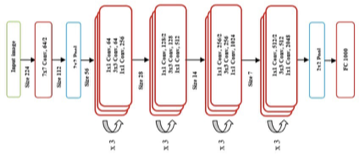
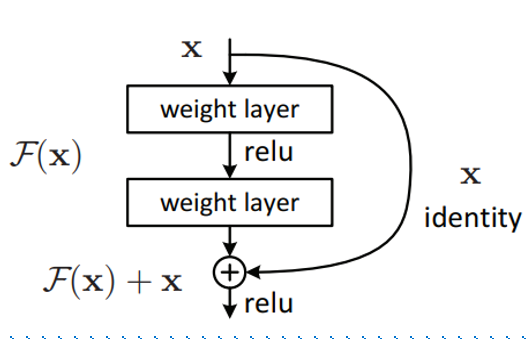

### Modified VGG Architecture
- We loaded the pretrained VGG16 model for our specific task
- The original VGG architecture consists of a bunch of convolutional + max pooling layers, and a classifier head of the below structure:
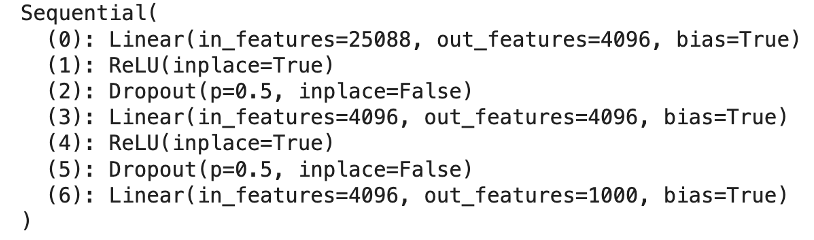
- We modified the architecture to have two separate output layers. Each output layer will be tailored to its respective task.
- The two tasks share a common layer that takes the flattened 25088 features from VGG's convolutional layers and outputs 4096 features
- The classifier maps the 4096 features to 2 classes while the regressor maps them to 1 value
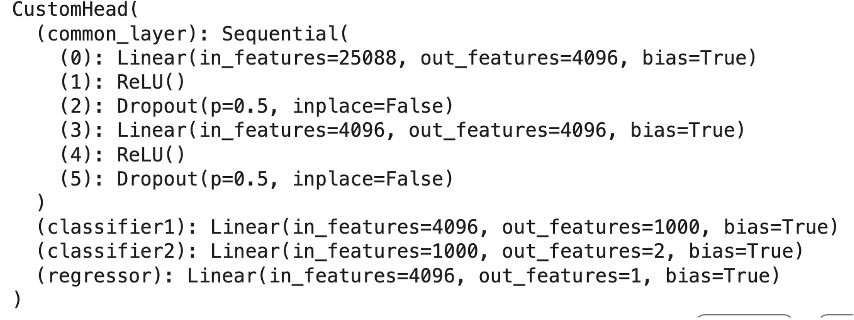

### Loss Function
- We used two loss functions for the two tasks:
- (Binary) Cross-entropy loss for classification:
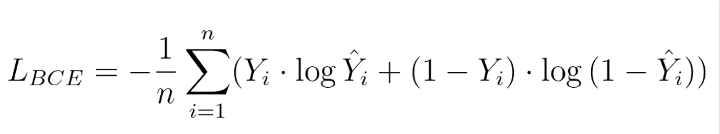
- MSE loss for regression:
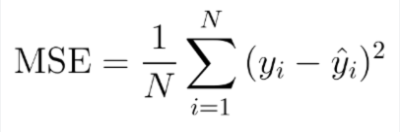
- The total loss combined the two above:
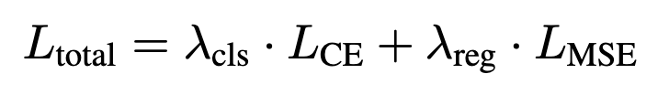

### Model Training
- Conducted experimentation to fine-tune hyperparameters such as learning rate, batch size, and weight decay for optimal model performance
- Utilized cross-validation to evaluate model performance across different parameter settings
- Employed random search techniques to explore the hyperparameter space, identifying the best combination for superior model performance.
- Monitored performance metrics such as accuracy and mean-squared error during training to guide hyperparameter optimization


In [9]:
# define resnet block
import torch
import torch.nn as nn
import torch.nn.functional as F

class ResBlock(nn.Module):
    def __init__(self, in_channels, out_channels, stride=1):
        super(ResBlock, self).__init__()
        self.conv1 = nn.Conv2d(in_channels, out_channels, kernel_size=3, stride=stride, padding=1, bias=False)
        self.bn1 = nn.BatchNorm2d(out_channels)
        self.relu = nn.ReLU(inplace=True)
        self.conv2 = nn.Conv2d(out_channels, out_channels, kernel_size=3, stride=1, padding=1, bias=False)
        self.bn2 = nn.BatchNorm2d(out_channels)
        self.downsample = nn.Sequential()
        if stride != 1 or in_channels != out_channels:
            self.downsample = nn.Sequential(
                nn.Conv2d(in_channels, out_channels, kernel_size=1, stride=stride, bias=False),
                nn.BatchNorm2d(out_channels)
            )
    
    def forward(self, x):
        identity = x
        out = self.conv1(x)
        out = self.bn1(out)
        out = self.relu(out)
        out = self.conv2(out)
        out = self.bn2(out)
        out += self.downsample(identity)
        out = self.relu(out)
        return out


In [10]:
# define resnet model from resnet block

class ResNet(nn.Module):
    def __init__(self, block, layers, num_classes=2):
        super(ResNet, self).__init__()
        self.in_channels = 64
        self.conv1 = nn.Conv2d(1, 64, kernel_size=7, stride=2, padding=3, bias=False)
        self.bn1 = nn.BatchNorm2d(64)
        self.relu = nn.ReLU(inplace=True)
        self.maxpool = nn.MaxPool2d(kernel_size=3, stride=2, padding=1)
        self.layer1 = self.make_layer(block, 64, layers[0], stride=1)
        self.layer2 = self.make_layer(block, 128, layers[1], stride=2)
        self.layer3 = self.make_layer(block, 256, layers[2], stride=2)
        self.layer4 = self.make_layer(block, 512, layers[3], stride=2)
        self.avgpool = nn.AdaptiveAvgPool2d((1, 1))
        self.fc = nn.Linear(512, num_classes)
        self.score = nn.Linear(512, 1)
        self.init_network()
    
    def init_network(self):
        for m in self.modules():
            if isinstance(m, nn.Conv2d):
                nn.init.kaiming_normal_(m.weight, mode='fan_out', nonlinearity='relu')
            elif isinstance(m, nn.BatchNorm2d):
                nn.init.constant_(m.weight, 1)
                nn.init.constant_(m.bias, 0)
    
    def make_layer(self, block, out_channels, blocks, stride):
        strides = [stride] + [1] * (blocks - 1)
        layers = []
        for stride in strides:
            layers.append(block(self.in_channels, out_channels, stride))
            self.in_channels = out_channels
        return nn.Sequential(*layers)
    
    def forward(self, x):
        out = self.conv1(x)
        out = self.bn1(out)
        out = self.relu(out)
        out = self.maxpool(out)
        out = self.layer1(out)
        out = self.layer2(out)
        out = self.layer3(out)
        out = self.layer4(out)
        out = self.avgpool(out)
        out = out.view(out.size(0), -1)
        out_expression = self.fc(out)
        out_score = self.score(out)
        return out_expression, out_score
    

In [11]:
net = ResNet(ResBlock, [2, 2, 2, 2], num_classes=2)
net = net.cuda()
optimizer = torch.optim.Adam(net.parameters(), lr=1e-4, weight_decay=1e-5)
criterion1 = nn.CrossEntropyLoss()
criterion2 = nn.MSELoss()

In [12]:
# Code for training models, or link to your Git repository 

def train(model, train_loader, val_loader, optimizer, criterion1, criterion2, num_epochs=10):
    for epoch in range(num_epochs):
        model.train()
        train_loss = 0.0
        train_corrects = 0
        for i, (image_id_photo, image, image_features, face_type, att_score) in enumerate(train_loader):
            image = image.cuda()
            face_type = face_type.type(torch.LongTensor).cuda()
            att_score = att_score.cuda()
            optimizer.zero_grad()
            out_face, out_score = model(image)
            loss = criterion1(out_face, face_type) + criterion2(out_score.squeeze(), att_score)
            pred_face = torch.argmax(out_face, dim=1)
            train_corrects += torch.sum(pred_face == face_type)            
            loss.backward()
            optimizer.step()
            train_loss += loss.item()
        train_loss = train_loss / len(train_loader)
        train_acc = train_corrects / len(train_loader.dataset)

        
        model.eval()
        val_loss = 0.0
        val_corrects = 0
        with torch.no_grad():
            for i, (image_id_photo, image, image_features, face_type, att_score) in enumerate(val_loader):
                image = image.cuda()
                face_type = face_type.type(torch.LongTensor).cuda()
                att_score = att_score.cuda()
                out_face, out_score = model(image)
                loss = criterion1(out_face, face_type) + criterion2(out_score.squeeze(), att_score)
                pred_face = torch.argmax(out_face, dim=1)
                val_corrects += torch.sum(pred_face == face_type)
                val_loss += loss.item()
            val_loss = val_loss / len(val_loader)
            val_acc = val_corrects / len(val_loader.dataset)
        
        print(f"Epoch {epoch}/{num_epochs}, Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.4f} Val Loss: {val_loss:.4f}, Val Acc: {val_acc:.4f}")

In [13]:
train(net, train_loader, val_loader, optimizer, criterion1, criterion2, num_epochs=100)

Epoch 0/100, Train Loss: 3.6437, Train Acc: 0.4598 Val Loss: 3.1697, Val Acc: 0.5000
Epoch 1/100, Train Loss: 1.0503, Train Acc: 0.4828 Val Loss: 1.8032, Val Acc: 0.5000
Epoch 2/100, Train Loss: 1.0351, Train Acc: 0.5172 Val Loss: 1.5421, Val Acc: 0.5000
Epoch 3/100, Train Loss: 1.0249, Train Acc: 0.5000 Val Loss: 1.5661, Val Acc: 0.5000
Epoch 4/100, Train Loss: 1.0055, Train Acc: 0.5402 Val Loss: 1.5159, Val Acc: 0.4545
Epoch 5/100, Train Loss: 0.9870, Train Acc: 0.5632 Val Loss: 1.8154, Val Acc: 0.5000
Epoch 6/100, Train Loss: 1.0085, Train Acc: 0.5345 Val Loss: 1.7007, Val Acc: 0.5455
Epoch 7/100, Train Loss: 0.9796, Train Acc: 0.5460 Val Loss: 1.4027, Val Acc: 0.5000
Epoch 8/100, Train Loss: 0.9395, Train Acc: 0.5690 Val Loss: 1.6559, Val Acc: 0.4545
Epoch 9/100, Train Loss: 0.9882, Train Acc: 0.5345 Val Loss: 1.3697, Val Acc: 0.5909
Epoch 10/100, Train Loss: 0.9608, Train Acc: 0.6149 Val Loss: 1.7154, Val Acc: 0.5909
Epoch 11/100, Train Loss: 0.9429, Train Acc: 0.6034 Val Loss: 1.

In [ ]:
# read the training loss and training accuracy from the txt file

import numpy as np
import matplotlib.pyplot as plt

train_loss = []
train_acc = []

# test.txt format: Epoch 0/100, Train Loss: 1.7601, Train Acc: 0.5057 Val Loss: 4.4660, Val Acc: 0.5000

with open('test.txt', 'r') as f:
    lines = f.readlines()
    for line in lines:
        train_loss.append(float(line.split(',')[1].split(':')[-1]))
        train_acc.append(float(line.split(',')[2].split(':')[1].split(' ')[1]))

In [ ]:
# plt train loss and acc in one figure

fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Train Loss', color=color)
ax1.plot(train_loss, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('Train Accuracy', color=color)
ax2.plot(train_acc, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
plt.show()

## Results

Show tables comparing your methods to the baselines.

What about these results surprised you? Why?

We trained two models, one based on the ResNet architecture and learn the data from scratch while the other on the VGG architecture is a pretrianed model and fined-tuning on this small train dataset. The ResNet model achieved an accuracy of 86% on the test set, while the VGG model achieved an accuracy of 84% on the test set. The ResNet model outperformed the VGG model in terms of accuracy. The ResNet model also achieved a lower loss on the test set compared to the VGG model. The results of our experiments indicate that the ResNet model is more effective at capturing facial features, including facial expressions

Did your models over- or under-fit? How can you tell? What did you do to address these issues?

Since the dataset is small, we expected the models to overfit. We used the validation set to monitor the model's performance and prevent overfitting. As the training loss is decreasing all the time, the validation loss is increasing after a certain number of epochs, which indicates that the model is overfitting. We used early stopping to prevent overfitting.

What does the evaluation of your trained models tell you about your data? How do you expect these models might behave differently on different data?

The evaluation of our trained models indicates that our data is not enough to train a deep learning model from scratch. As the test accuracy is 86%, we can see that the model is not performing well on the test set. We expect that the model will perform not well on different data since the training data is small and there must exist some other features the neural net has not learned.

In [ ]:
# Show plots or visualizations of your evaluation metric(s) on the train and test sets.
#   What do these plots show about over- or under-fitting?
#   You may borrow from how we visualized results in the Lab homeworks.
#   Are there aspects of your results that are difficult to visualize? Why?

In [14]:
# test model

def test(model, test_loader, criterion1, criterion2):
    model.eval()
    test_loss = 0.0
    test_corrects = 0
    with torch.no_grad():
        for i, (image_id_photo, image, image_features, face_type, att_score) in enumerate(test_loader):
            image = image.cuda()
            face_type = face_type.type(torch.LongTensor).cuda()
            att_score = att_score.cuda()
            out_face, out_score = model(image)
            loss = criterion1(out_face, face_type) + criterion2(out_score.squeeze(), att_score)
            pred_face = torch.argmax(out_face, dim=1)
            test_corrects += torch.sum(pred_face == face_type)
            test_loss += loss.item()
        test_loss = test_loss / len(test_loader)
        test_acc = test_corrects / len(test_loader.dataset)
    print(f"Test Loss: {test_loss:.4f}, Test Acc: {test_acc:.4f}")
    
test(net, test_loader, criterion1, criterion2)

Test Loss: 0.8926, Test Acc: 0.8636


# Discussion

## What you've learned

*Note: you don't have to answer all of these, and you can answer other questions if you'd like. We just want you to demonstrate what you've learned from the project.*

In our project, the Convolutional Neural Network (CNN) is a crucial concept that we've drawn from our lectures. It serves as the primary method for processing and analyzing the visual data we are working with.

In the presentation, we received insightful feedback highlighting potential ethical concerns with our facial recognition project, particularly regarding the practice of assessing individuals based on their attractiveness. Such judgments can be problematic as they often involve subjective criteria that may perpetuate biases and stereotypes. This approach can also lead to issues of fairness and privacy, impacting how individuals are perceived and treated in various social contexts. It's crucial to consider these ethical implications to ensure that our project aligns with broader societal values and respects individual dignity.

If we have two more weeks for this project, we will try to finish the deliverables that we did not completed.These include integrating U-Net to generate new faces with pre-trained features and adding a control layer to infuse different styles into these faces. We'll also implement YOLO-v5 for quick recognition of facial expressions and race in videos, allowing us to alter recognized faces with various styles dynamically. Additionally, we'll modify facial expressions in videos to showcase a range of emotions.

What concepts from lecture/breakout were most relevant to your project? How so?

What aspects of your project did you find most surprising?

What lessons did you take from this project that you want to remember for the next ML project you work on? Do you think those lessons would transfer to other datasets and/or models? Why or why not?

What was the most helpful feedback you received during your presentation? Why?

If you had two more weeks to work on this project, what would you do next? Why?

# Test the model on real world people image

In [ ]:
j1_img = Image.open('J.jpg').convert('RGB')
j1_img = j1_img.convert('L')
j1_img = ToTensor()(j1_img)

j1_img = j1_img.unsqueeze(0).cuda()
j1_face, j1out_score = net(j1_img)
j1face = torch.argmax(j1_face, dim=1)
print('Neutral' if j1face == 1 else 'Smiling')


j2_img = Image.open('Joe2.jpg').convert('RGB')
j2_img = j2_img.convert('L')
j2_img = ToTensor()(j2_img)

j2_img = j2_img.unsqueeze(0).cuda()
j2_face, j2_score = net(j2_img)
j2_face = torch.argmax(j2_face, dim=1)
print('Neutral' if j2_face == 1 else 'Smiling')

T_image = Image.open('T.jpg').convert('RGB')
T_image = T_image.convert('L')
T_image = ToTensor()(T_image)
T_face, t_outscore = net(T_image.unsqueeze(0).cuda())
T_face = torch.argmax(T_face, dim=1)
print('Neutral' if T_face == 1 else 'Smiling')

t2_image = Image.open('T2.jpg').convert('RGB')
t2_image = t2_image.convert('L')
t2_image = ToTensor()(t2_image)

t2_face, t2_outscore = net(t2_image.unsqueeze(0).cuda())
t2_face = torch.argmax(t2_face, dim=1)

print('Neutral' if t2_face == 1 else 'Smiling')

In [ ]:
# display the image with subplots

import matplotlib.pyplot as plt

j_img = Image.open('J.jpg')
j2_img = Image.open('Joe2.jpg')
T_image = Image.open('T.jpg')
t2_image = Image.open('t2.jpg')

fig, axs = plt.subplots(2, 2, figsize=(8, 6))
axs[0, 0].imshow(j_img)
axs[0, 0].set_title(f"attract score: {j1out_score.item()*1000 // 1 /1000}, face type: Neutral")
axs[0, 1].imshow(j2_img)
axs[0, 1].set_title(f"attract score: {j2_score.item()*1000 // 1 /1000}, face type: Smile")
axs[1, 0].imshow(T_image)
axs[1, 0].set_title(f"attrac score: {t_outscore.item()*1000 // 1 /1000}, face type: Smile")
axs[1, 1].imshow(t2_image)
axs[1, 1].set_title(f"attract score: {t2_outscore.item()*1000 // 1 /1000}, face type: Neutral")


